## Reading EEG data of a single subject

In [38]:
import pandas as pd
data1=pd.read_csv("./Dataset/subject_01.csv")
data1.head()

,0,-16640,1075.3,7197.5,1501.7,-4080.5,872.67,-7446.6,-3852.2,1030.8,-8910.8,959.38,-2181.5,8054.1,-10051,13269,-19776,0.1,0.2
0,0.001953,-16635,1079.3,7204.3,1506.2,-4079.5,877.05,-7445.6,-3850.3,1030.4,-8908.5,960.23,-2170.2,8059.6,-10066.0,13262,-19779,0,0
1,0.003906,-16637,1078.2,7205.8,1505.0,-4078.3,884.08,-7446.9,-3848.2,1034.6,-8907.6,960.58,-2172.2,8063.1,-10064.0,13268,-19773,0,0
2,0.005859,-16640,1075.8,7200.0,1505.7,-4082.1,883.72,-7445.1,-3846.9,1029.3,-8909.2,961.27,-2172.0,8065.8,-10062.0,13270,-19771,0,0
3,0.007812,-16641,1077.9,7203.8,1510.0,-4076.7,880.42,-7439.3,-3840.8,1039.5,-8897.2,970.28,-2159.3,8071.2,-10049.0,13282,-19760,0,0
4,0.009766,-16642,1077.4,7200.6,1511.4,-4078.4,878.31,-7436.7,-3848.6,1032.8,-8896.2,970.89,-2162.7,8070.9,-10044.0,13285,-19757,0,0


### Shape of the input table

In [39]:
data1.shape

(119807, 19)

### Reading the demographic information

* Fatigue corresponds to the stress level of the subject

In [40]:
import pandas as pd
data=pd.read_csv("demographic.csv")
data.head()

,Subject,IsMan,Age,Fatigue
0,1,1,27,5
1,2,1,23,0
2,3,1,44,2
3,4,1,26,2
4,5,1,26,4


### Graphs describing the nature of data

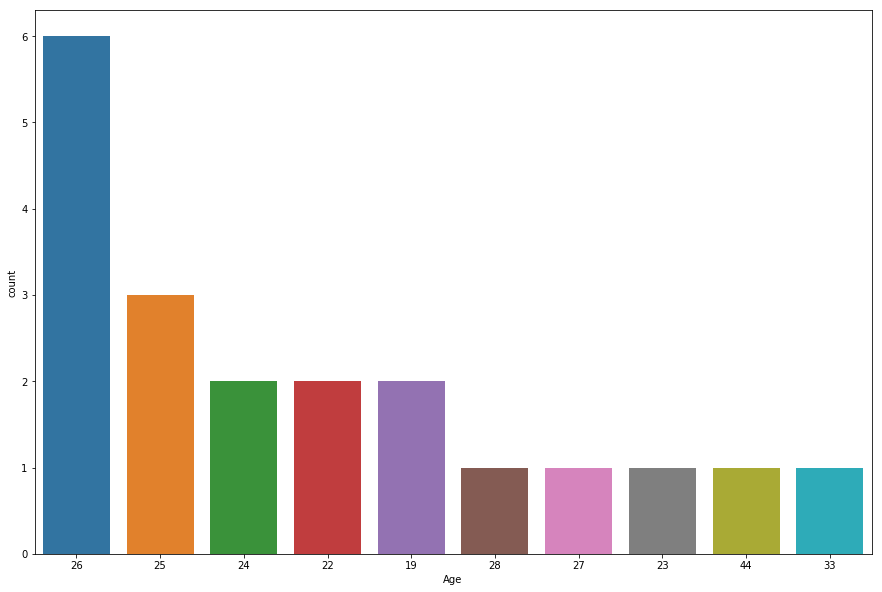

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'Age',
              data = data,
              order = data['Age'].value_counts().index)
plt.show()

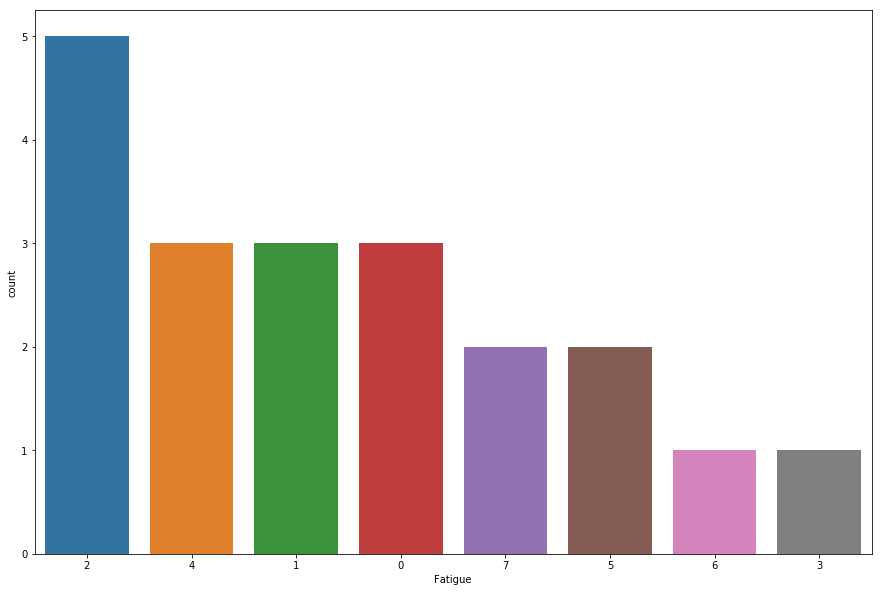

In [42]:
sns.countplot(x = 'Fatigue',
              data = data,
              order = data['Fatigue'].value_counts().index)
plt.show()

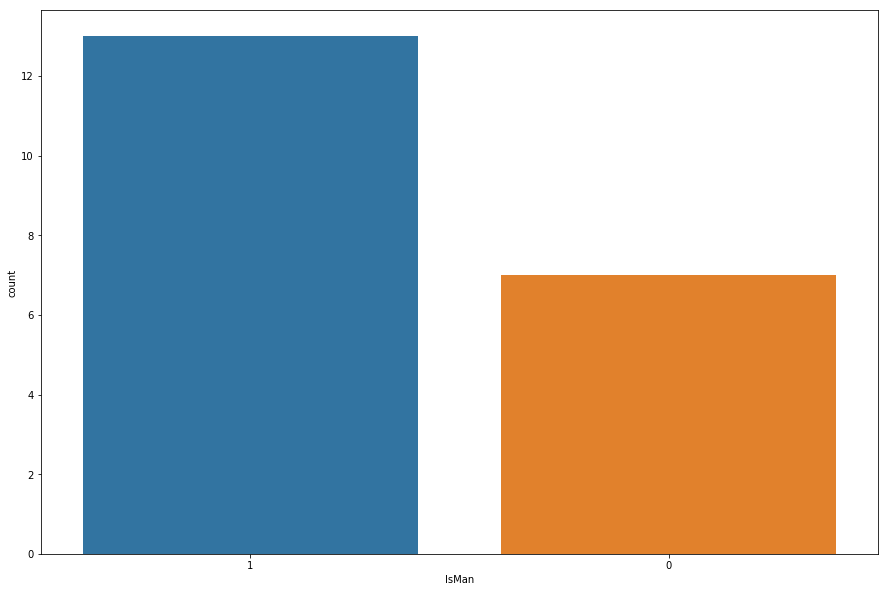

In [43]:
sns.countplot(x = 'IsMan',
              data = data,
              order = data['IsMan'].value_counts().index)
plt.show()

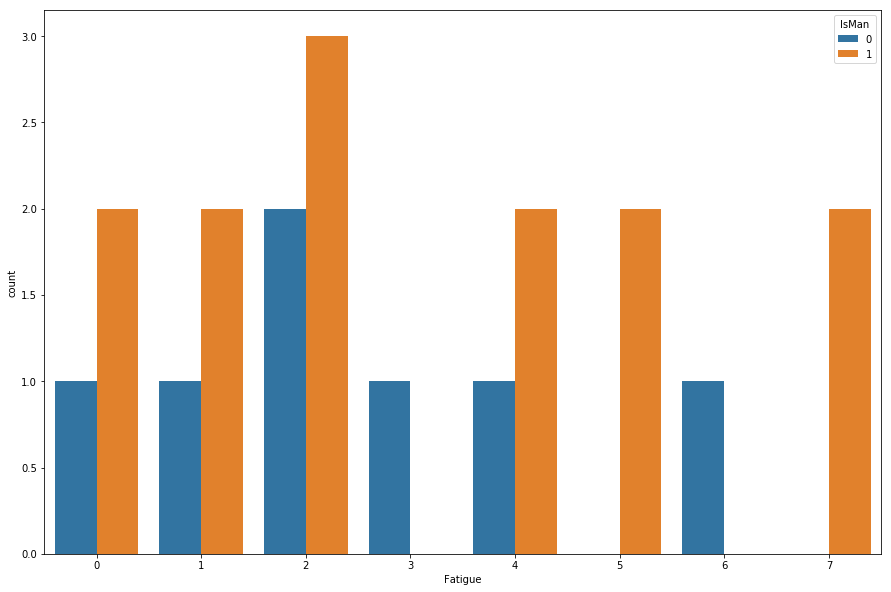

In [44]:
x = sns.countplot(x="Fatigue", hue="IsMan", data=data)

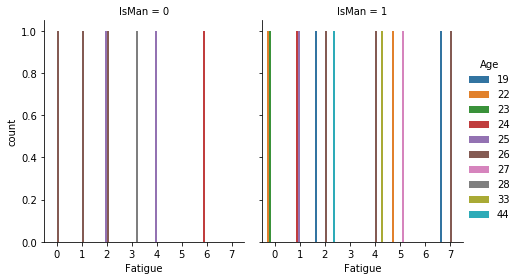

In [45]:
g = sns.catplot(x="Fatigue", hue="Age", col="IsMan", data=data, kind="count", height=4, aspect=.8);

### Read one subject and parse data using MNE library

Creating RawArray with float64 data, n_channels=16, n_times=119808
    Range : 0 ... 119807 =      0.000 ...   233.998 secs
Ready.


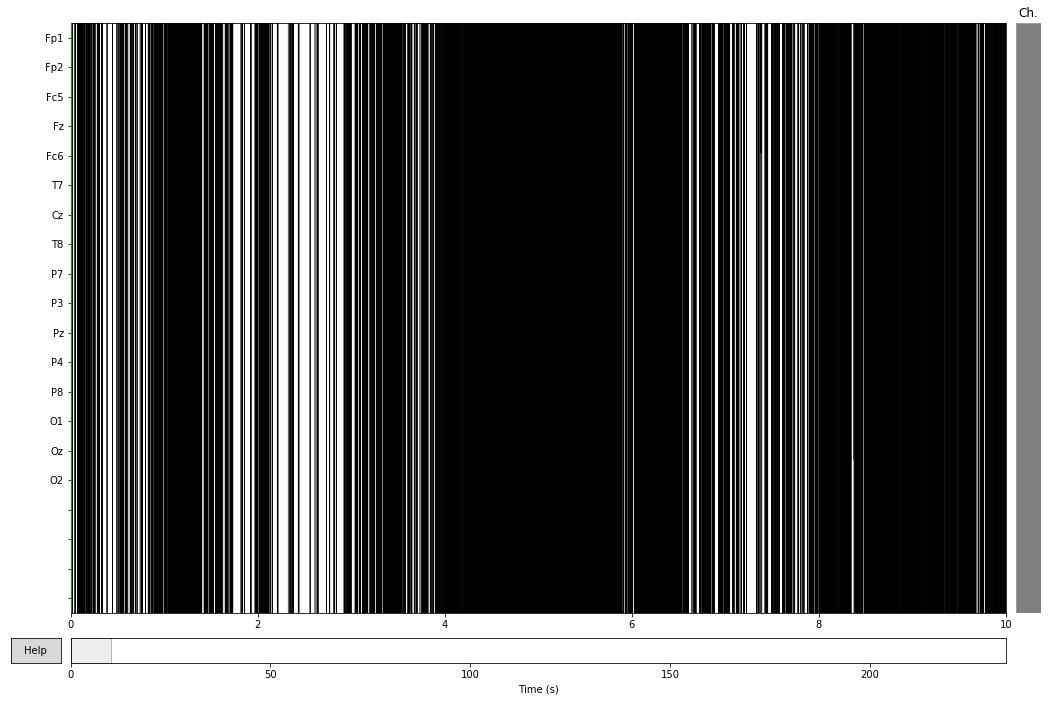

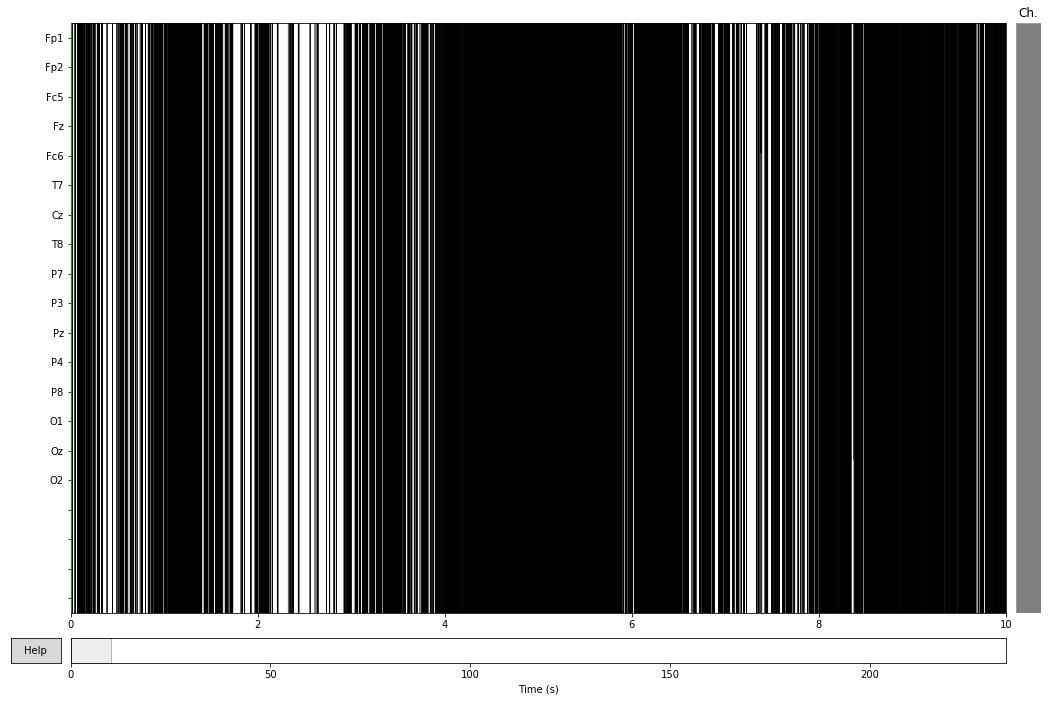

In [46]:
import numpy as np
import mne
import pandas as pd

# Read the CSV file as a NumPy array
_data = np.loadtxt('subject_01_mne.csv', delimiter=',')
data = _data.T[1:, :]

# Some information about the channels
header = pd.read_csv("header.csv")

ch_names = list(header.columns[1:17])

# Sampling rate of the Nautilus machine
sfreq = 512  # Hz

# Create the info structure needed by MNE
info = mne.create_info(ch_names, sfreq)

# Finally, create the Raw object
raw = mne.io.RawArray(data, info)

# Plot it!
#raw.plot(block=False, start=100, duration=300, lowpass=40)
raw.plot()

#### Information on the subject array read in previous step

In [47]:
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, Fc5, Fz, Fc6, T7, Cz, T8, P7, ...
    chs : list | 16 items (MISC: 16)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 256.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 16
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneType
>

#### Plot EEG Channels vs time for a small time segment

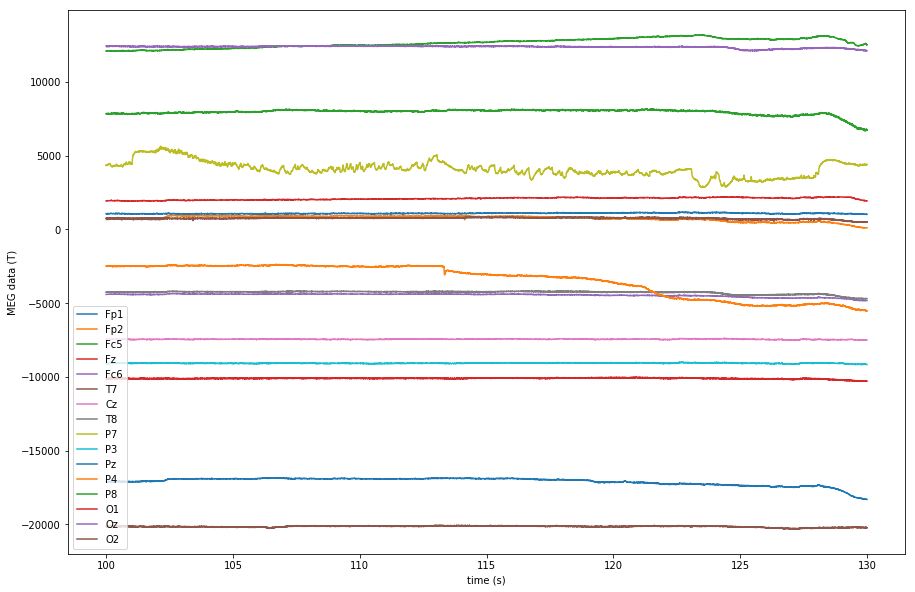

In [48]:
start, stop = raw.time_as_index([100, 130])  # 100s to 130s data segment

data, times = raw[:, start:stop]
import plotly.plotly as py

plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel('MEG data (T)')
plt.legend(raw.ch_names)

fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15  
fig_size[1] = 10  
plt.rcParams["figure.figsize"] = fig_size 

### Reading data file to generate custom 'raw structure'

In [49]:
# Load one subject's data
_data = np.loadtxt('subject_01_mne.csv', delimiter=',')
data = _data.T[1:, :]

# Some information about the channels
header = pd.read_csv("header.csv")

ch_names = list(header.columns[1:17])
chan_types = ['eeg' for i in range(len(ch_names))]

# Sampling rate of the Nautilus machine
sfreq = 512  # Hz

# Initialize an info structure
info = mne.create_info(
    ch_names=ch_names,
    ch_types=chan_types,
    sfreq=512
)

custom_raw = mne.io.RawArray(data, info)
print(custom_raw)

Creating RawArray with float64 data, n_channels=16, n_times=119808
    Range : 0 ... 119807 =      0.000 ...   233.998 secs
Ready.
<RawArray  |  None, n_channels x n_times : 16 x 119808 (234.0 sec), ~14.7 MB, data loaded>


#### Apply notch filter

In [50]:
raw_bits = custom_raw.copy()

raw_bits.notch_filter(freqs = np.arange(60, 241, 60))

Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected


<RawArray  |  None, n_channels x n_times : 16 x 119808 (234.0 sec), ~14.7 MB, data loaded>

#### Plot the output of notch filter

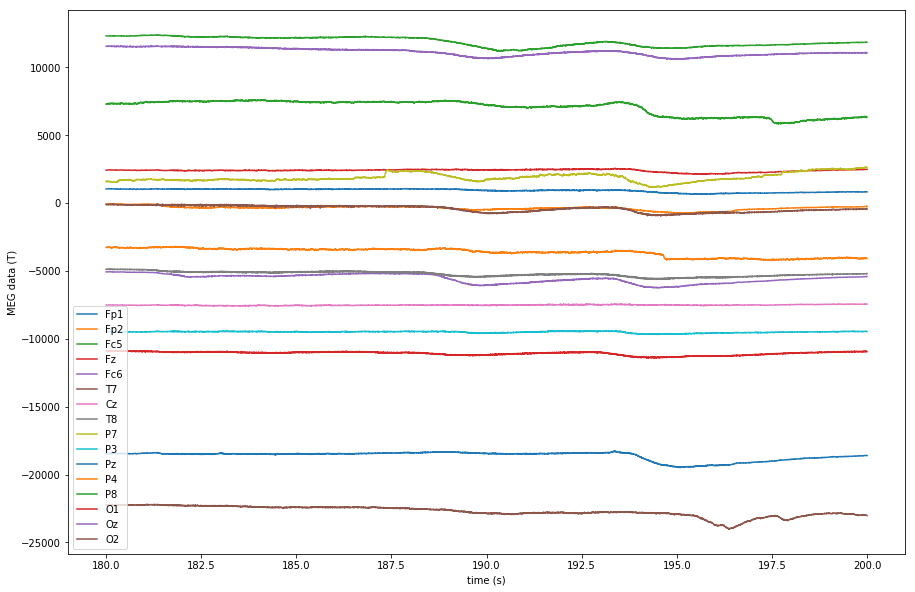

In [51]:
start, stop = raw_bits.time_as_index([180, 200])  # 100s to 130s data segment

data, times = raw_bits[:, start:stop]
import plotly.plotly as py

plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel('MEG data (T)')
plt.legend(raw.ch_names)

fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15  
fig_size[1] = 10  
plt.rcParams["figure.figsize"] = fig_size 

###  Applying ICA to pick the component with ocular artifact

In [52]:
raw_bits.set_montage("standard_1020")

ica = mne.preprocessing.ICA(method="extended-infomax", random_state=1)
ica.fit(raw_bits)

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 16
Computing Extended Infomax ICA
Fitting ICA took 25.4s.


<ICA  |  raw data decomposition, fit (extended-infomax): 119808 samples, 16 components, channels used: "eeg">

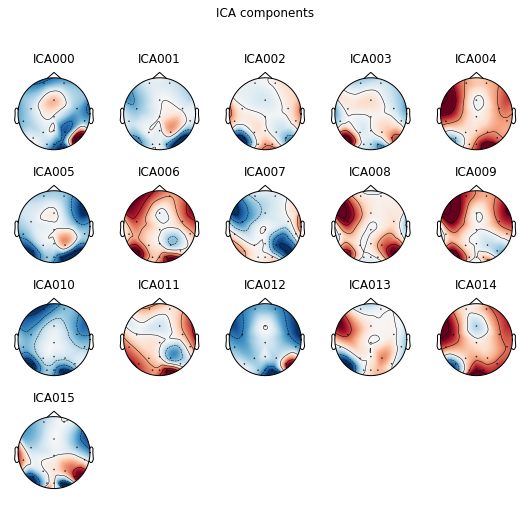

[<Figure size 540x504 with 20 Axes>]

In [53]:
ica.plot_components(inst=raw_bits)

#### Removing the channel with ocular effect

In [54]:
ica.exclude = [6]

In [55]:
raw_corrected = raw_bits.copy()
ica.apply(raw_corrected)

Transforming to ICA space (16 components)
Zeroing out 1 ICA components


<RawArray  |  None, n_channels x n_times : 16 x 119808 (234.0 sec), ~14.7 MB, data loaded>

#### Plot the channels before/after ocular artifact removal

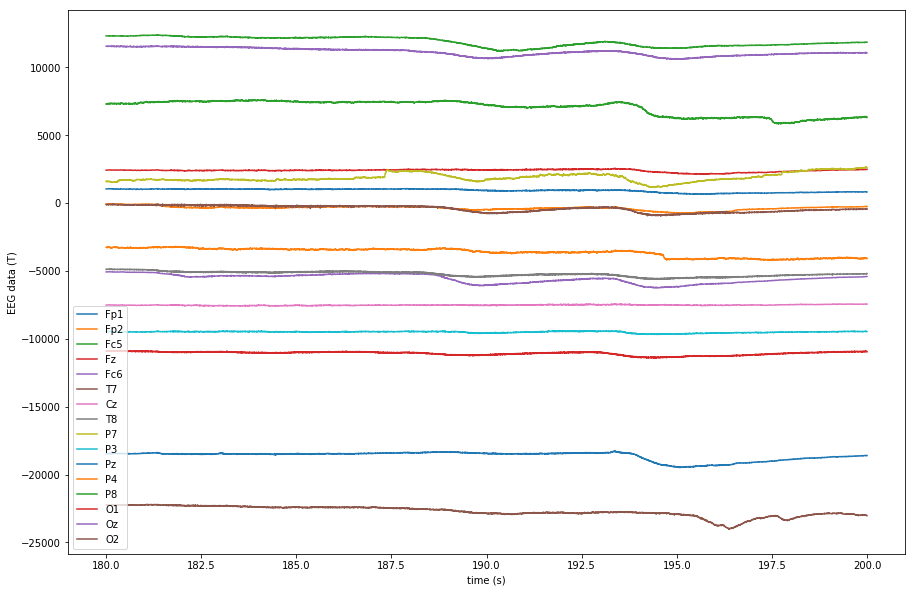

In [56]:
start, stop = custom_raw.time_as_index([180, 200])  # 100s to 130s data segment

data, times = custom_raw[:, start:stop]
import plotly.plotly as py

plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel('EEG data (T)')
plt.legend(raw.ch_names)

fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15  
fig_size[1] = 10  
plt.rcParams["figure.figsize"] = fig_size 

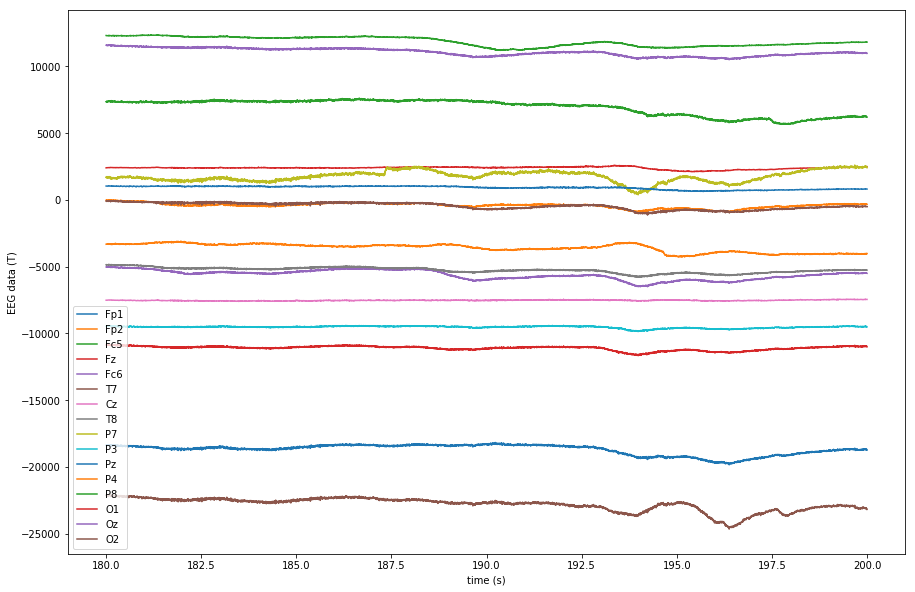

In [57]:
start, stop = raw_corrected.time_as_index([180, 200])  # 100s to 130s data segment

data, times = raw_corrected[:, start:stop]
import plotly.plotly as py

plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel('EEG data (T)')
plt.legend(raw.ch_names)

fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15  
fig_size[1] = 10  
plt.rcParams["figure.figsize"] = fig_size 

### Applying Hilbert transform for feature extraction

In [58]:
raw_hilb = raw_corrected.copy()
hilb_picks = mne.pick_types(raw_corrected.info, meg=False, eeg=True)
raw_hilb.apply_hilbert(hilb_picks)
print(raw_hilb._data.dtype)

#raw_hilb._data[0]

complex64


/home/sreejith/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



Text(0.5, 1.0, 'Phase of frequency band')

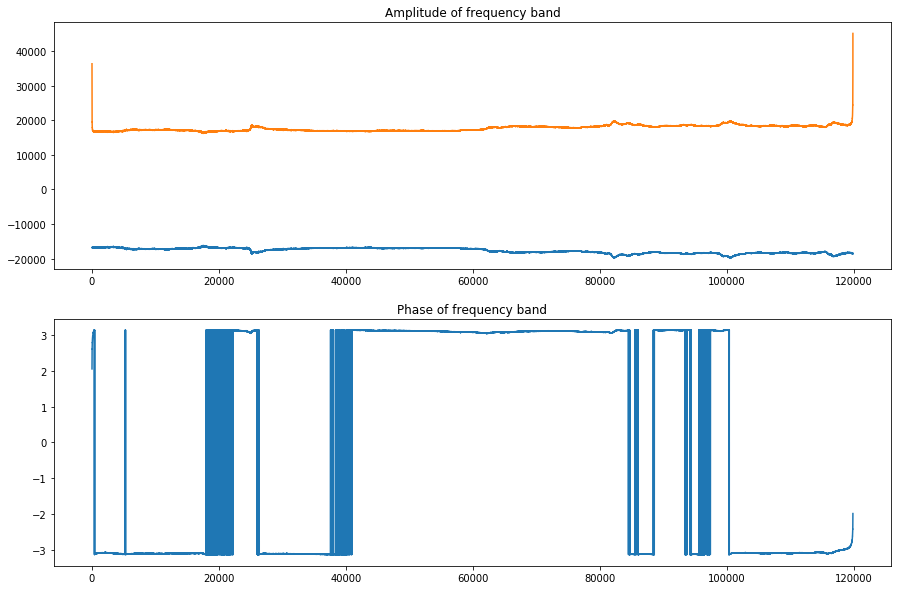

In [59]:
# Take the amplitude and phase
raw_amp = raw_hilb.copy()
raw_amp.apply_function(np.abs, hilb_picks)
raw_phase = raw_hilb.copy()
raw_phase.apply_function(np.angle, hilb_picks)

f, (a1, a2) = plt.subplots(2, 1, figsize=(15, 10))
a1.plot(raw_corrected._data[hilb_picks[0]])
a1.plot(raw_amp._data[hilb_picks[0]])
a2.plot(raw_phase._data[hilb_picks[0]])
a1.set_title('Amplitude of frequency band')
a2.set_title('Phase of frequency band')

In [60]:
raw_hilb._data.shape

(16, 119808)

In [61]:
raw_corrected._data[0].shape

(119808,)

#### Extraction of features and store into list of features

In [62]:
import glob
import numpy as np
from scipy.signal import hilbert
import mne
import pandas as pd
import matplotlib.pyplot as plt
import os

raw_list = []
ocular_list = []
file_list = []

if not (os.path.exists("raw_eeg_list.pkl")):

    count = 0

    for fname in glob.glob("./Dataset/subject*csv"):

        count += 1

        print("Reading "+str(count)+"nd/th file:", fname)

        # Load one subject's data
        _data = np.loadtxt(fname, delimiter=',')
        data = _data.T[1:-2, :]

        # Some information about the channels
        header = pd.read_csv("header.csv")

        ch_names = list(header.columns[1:17])
        ch_types = ['eeg' for i in range(len(ch_names))]

        # Sampling rate of the Nautilus machine
        sfreq = 512  # Hz

        # Initialize an info structure
        info = mne.create_info(
            ch_names=ch_names,
            ch_types=ch_types,
            sfreq=512
        )

        custom_raw = mne.io.RawArray(data, info)

        # Apply notch filter
        print("Applying notch filter")
        raw_bits = custom_raw.copy()
        raw_bits.notch_filter(freqs = np.arange(60, 241, 60))

        # Apply ocular artifact removal
        print("Applying ICA for ocular artifact removal")
        raw_bits.set_montage("standard_1020")

        ica = mne.preprocessing.ICA(method="extended-infomax", random_state=1)
        ica.fit(raw_bits)
        ica.plot_components(inst=raw_bits)
        plt.show()

        ind = int(input("Enter the ind for ocular artifact removal\n"))
        if ind != -1:
            ica.exclude = [ind]

        # Apply ICA
        raw_corrected = raw_bits.copy()
        ica.apply(raw_corrected)

        # apply Hilbert transform for feature extraction
        print("Applying Hilbert transform")
        raw_hilb = raw_corrected.copy()
        hilb_picks = mne.pick_types(raw_corrected.info, meg=False, eeg=True)
        raw_hilb.apply_hilbert(hilb_picks)

        # Append to feature list
        raw_list.append(raw_hilb)

        # Append to Ocular list for future use
        ocular_list.append(ind)

        # Append to file name list
        file_list.append(fname)

In [63]:
import pickle
import os

if not (os.path.exists("raw_eeg_list.pkl")):
    print("Writing features and realted info to disk")
    
    pickle.dump(raw_list, open("raw_eeg_list.pkl", "wb"))
    pickle.dump(ocular_list, open("ocular_list.pkl", "wb"))
    pickle.dump(file_list, open("file_list.pkl", "wb"))
else:
    print("Reading features and realted info from disk")
    
    raw_list = pickle.load(open("raw_eeg_list.pkl", "rb"))
    ocular_list = pickle.load(open("ocular_list.pkl", "rb"))
    file_list = pickle.load(open("file_list.pkl", "rb"))
    

Reading features and realted info from disk


In [64]:
from skimage import measure

# Average pooling + Classifier
def avgPooling(arr, length):
    
    avg_np = np.array([])
    
    for row in arr.T:
        row = row.reshape(-1, length)   
        avg = measure.block_reduce(row, (row.shape[0], 1), np.mean)
                
        if not len(avg_np):
            avg_np = avg
        else:
            avg_np = np.vstack((avg_np, avg))
    print("[avgPooling]: array shape", avg_np.shape)    
    return avg_np.flatten()

def padAny(arr):
    pad_length = int( 100 * np.ceil(len(arr)/100) - len(arr) )
    print("Pad length:", pad_length)              

    arr = np.pad(arr, ((pad_length, 0),(0, 0)), 'constant')
    print("Shape after padding:", arr.shape)
    
    return arr
    
def padPoolRaw(raw):
    _real = np.real(raw.to_data_frame())
    print("Original shape (Real):", _real.shape)

    _imag = np.imag(raw.to_data_frame())
    print("Original shape (Imaginary):", _imag.shape)
    
    _real = padAny(_real)
    print("After reshape (Real):", _real.shape)
    _imag = padAny(_imag)
    print("After reshape (Imaginary):", _imag.shape)    
    
    real_avg = avgPooling(_real, 100)
    imag_avg = avgPooling(_imag, 100)
    
    print("Shape of real average:", real_avg.shape)
    print("Shape of imag average:", imag_avg.shape)
    
    feature = np.hstack((real_avg, imag_avg))
    print("Shape of feature:", feature.shape)
    
    return feature
    
#data = raw_list[10]
#padPoolRaw(data)

feat_list = []
for raw in raw_list:
    feature = padPoolRaw(raw)
    feat_list.append(feature)


Converting time column to int64...
Original shape (Real): (97120, 16)
Converting time column to int64...
Original shape (Imaginary): (97120, 16)
Pad length: 80
Shape after padding: (97200, 16)
After reshape (Real): (97200, 16)
Pad length: 80
Shape after padding: (97200, 16)
After reshape (Imaginary): (97200, 16)
[avgPooling]: array shape (16, 100)
[avgPooling]: array shape (16, 100)
Shape of real average: (1600,)
Shape of imag average: (1600,)
Shape of feature: (3200,)
Converting time column to int64...
Original shape (Real): (119808, 16)
Converting time column to int64...
Original shape (Imaginary): (119808, 16)
Pad length: 92
Shape after padding: (119900, 16)
After reshape (Real): (119900, 16)
Pad length: 92
Shape after padding: (119900, 16)
After reshape (Imaginary): (119900, 16)
[avgPooling]: array shape (16, 100)
[avgPooling]: array shape (16, 100)
Shape of real average: (1600,)
Shape of imag average: (1600,)
Shape of feature: (3200,)
Converting time column to int64...
Original sh

Shape after padding: (89900, 16)
After reshape (Real): (89900, 16)
Pad length: 76
Shape after padding: (89900, 16)
After reshape (Imaginary): (89900, 16)
[avgPooling]: array shape (16, 100)
[avgPooling]: array shape (16, 100)
Shape of real average: (1600,)
Shape of imag average: (1600,)
Shape of feature: (3200,)
Converting time column to int64...
Original shape (Real): (183648, 16)
Converting time column to int64...
Original shape (Imaginary): (183648, 16)
Pad length: 52
Shape after padding: (183700, 16)
After reshape (Real): (183700, 16)
Pad length: 52
Shape after padding: (183700, 16)
After reshape (Imaginary): (183700, 16)
[avgPooling]: array shape (16, 100)
[avgPooling]: array shape (16, 100)
Shape of real average: (1600,)
Shape of imag average: (1600,)
Shape of feature: (3200,)
Converting time column to int64...
Original shape (Real): (74112, 16)
Converting time column to int64...
Original shape (Imaginary): (74112, 16)
Pad length: 88
Shape after padding: (74200, 16)
After reshape

In [65]:
import re

demographics = pd.read_csv("demographic.csv")
print(demographics.head())

label_list = []

for fname in file_list:
    ind = int(re.findall('(/subject_)(\d+)', fname)[0][1])
    print("File name:", fname)
    label = int( demographics[demographics["Subject"] == ind]["Fatigue"] )
    print("Label:", label)
    label_list.append(label)
    
print()
print(label_list)

   Subject  IsMan  Age  Fatigue
0        1      1   27        5
1        2      1   23        0
2        3      1   44        2
3        4      1   26        2
4        5      1   26        4
File name: ./Dataset/subject_06.csv
Label: 7
File name: ./Dataset/subject_01.csv
Label: 5
File name: ./Dataset/subject_07.csv
Label: 1
File name: ./Dataset/subject_17.csv
Label: 1
File name: ./Dataset/subject_13.csv
Label: 5
File name: ./Dataset/subject_15.csv
Label: 1
File name: ./Dataset/subject_19.csv
Label: 6
File name: ./Dataset/subject_20.csv
Label: 2
File name: ./Dataset/subject_12.csv
Label: 0
File name: ./Dataset/subject_05.csv
Label: 4
File name: ./Dataset/subject_14.csv
Label: 4
File name: ./Dataset/subject_08.csv
Label: 7
File name: ./Dataset/subject_03.csv
Label: 2
File name: ./Dataset/subject_11.csv
Label: 2
File name: ./Dataset/subject_04.csv
Label: 2
File name: ./Dataset/subject_16.csv
Label: 4
File name: ./Dataset/subject_10.csv
Label: 0
File name: ./Dataset/subject_18.csv
Label: 

In [66]:
# Considering fatigue above 4 to stressed (label: 1) and the rest to be not stressed (label: 0)

updated_labels = [1 if lab > 4 else 0 for lab in label_list]
print(updated_labels)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feat_list, updated_labels, test_size=0.3, shuffle=True, random_state=10)

from sklearn.svm import SVC
clf = SVC()
clf.fit(xtrain, ytrain)

clf.score(xtest, ytest)

[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


/home/sreejith/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.8333333333333334